In [1]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance

%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv("combine.csv")
data
# data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,18-11-1999,28.612303,32.546494,62546380,35.765381,31.473534,27.066582
1,19-11-1999,28.478184,30.713518,15234146,30.758226,28.880545,24.836662
2,22-11-1999,28.657009,29.551144,6577870,31.473534,31.473534,27.066582
3,23-11-1999,28.612303,30.400572,5975611,31.205294,28.612303,24.605980
4,24-11-1999,28.612303,28.701717,4843231,29.998213,29.372318,25.259573
...,...,...,...,...,...,...,...
5668,31-05-2022,126.720001,128.910004,3403100,130.070007,127.559998,127.559998
5669,01-06-2022,122.430000,127.860001,1757600,128.979996,123.089996,123.089996
5670,02-06-2022,122.300003,122.959999,1444400,129.190002,129.100006,129.100006
5671,03-06-2022,126.419998,127.620003,1722800,128.720001,128.490005,128.490005


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5673 entries, 0 to 5672
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5673 non-null   object 
 1   Low             5673 non-null   float64
 2   Open            5673 non-null   float64
 3   Volume          5673 non-null   int64  
 4   High            5673 non-null   float64
 5   Close           5673 non-null   float64
 6   Adjusted Close  5673 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 310.4+ KB


In [4]:
data.describe()


,Low,Open,Volume,High,Close,Adjusted Close
count,5673.000000,5673.000000,5.673000e+03,5673.000000,5673.000000,5673.000000
mean,42.397622,42.951082,3.502516e+06,43.504494,42.959566,40.638441
std,32.956759,33.317961,2.440656e+06,33.647255,33.297132,33.733204
min,7.510730,7.653791,2.719000e+05,7.961373,7.761087,6.674372
25%,21.645206,21.924177,1.997323e+06,22.267525,21.981401,19.414112
50%,29.649500,30.050072,2.990042e+06,30.464951,30.042917,27.403742
75%,51.189198,51.689999,4.328100e+06,52.459999,51.660000,47.329884
max,177.169998,179.279999,6.254638e+07,179.570007,179.279999,178.821518


In [5]:
data.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [6]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

/tmp/ipykernel_26347/2985681012.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,18-11-1999,28.612303,32.546494,62546380,35.765381,31.473534,27.066582
1,19-11-1999,28.478184,30.713518,15234146,30.758226,28.880545,24.836662
2,22-11-1999,28.657009,29.551144,6577870,31.473534,31.473534,27.066582
3,23-11-1999,28.612303,30.400572,5975611,31.205294,28.612303,24.605980
4,24-11-1999,28.612303,28.701717,4843231,29.998213,29.372318,25.259573


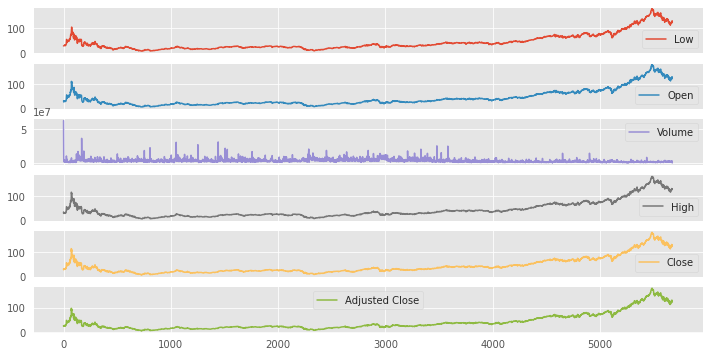

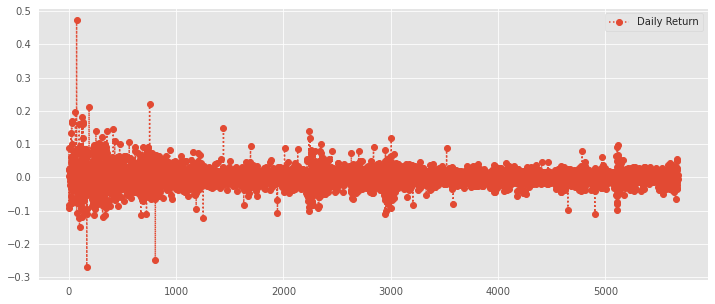

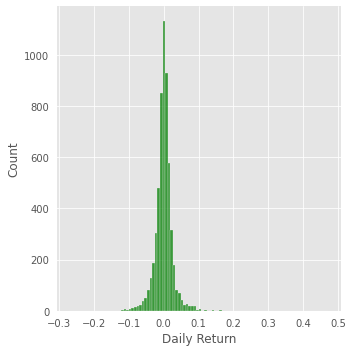

/tmp/ipykernel_26347/2438974047.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


            Date         Low        Open    Volume        High       Close  \
0     18-11-1999   28.612303   32.546494  62546380   35.765381   31.473534   
1     19-11-1999   28.478184   30.713518  15234146   30.758226   28.880545   
2     22-11-1999   28.657009   29.551144   6577870   31.473534   31.473534   
3     23-11-1999   28.612303   30.400572   5975611   31.205294   28.612303   
4     24-11-1999   28.612303   28.701717   4843231   29.998213   29.372318   
...          ...         ...         ...       ...         ...         ...   
5668  31-05-2022  126.720001  128.910004   3403100  130.070007  127.559998   
5669  01-06-2022  122.430000  127.860001   1757600  128.979996  123.089996   
5670  02-06-2022  122.300003  122.959999   1444400  129.190002  129.100006   
5671  03-06-2022  126.419998  127.620003   1722800  128.720001  128.490005   
5672  06-06-2022  128.660004  129.380005    283468  130.000000  129.389999   

      Adjusted Close  MA for 10 days  MA for 50 days  MA for 10

Date               0
Low                0
Open               0
Volume             0
High               0
Close              0
Adjusted Close     0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

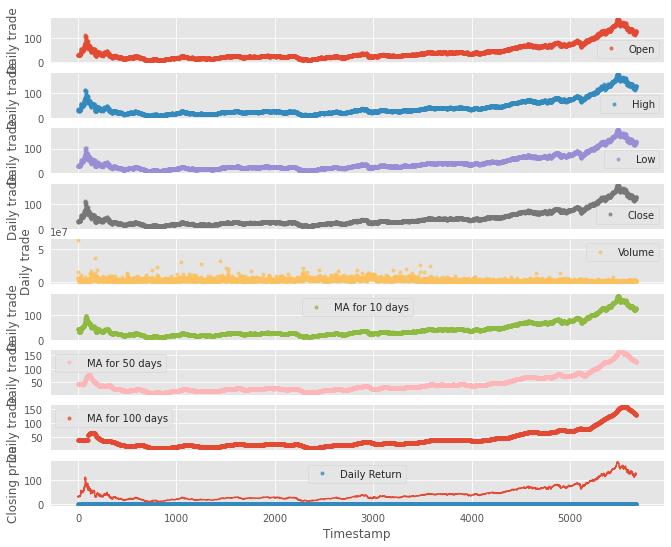

In [7]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

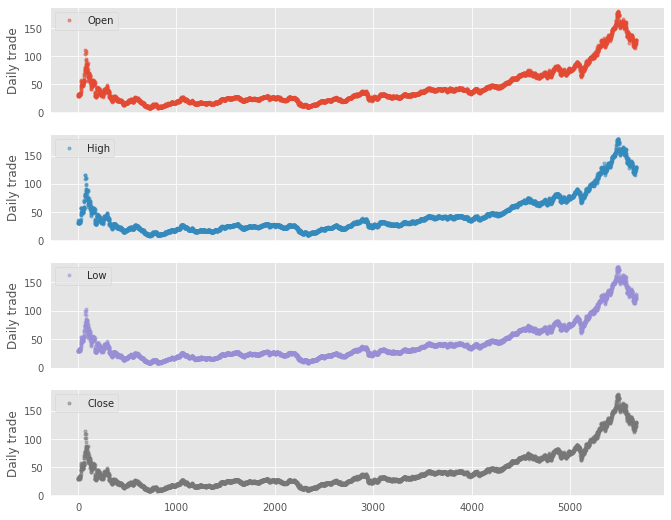

In [8]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date         Low        Open    Volume        High       Close  \
0     18-11-1999   28.612303   32.546494  62546380   35.765381   31.473534   
1     19-11-1999   28.478184   30.713518  15234146   30.758226   28.880545   
2     22-11-1999   28.657009   29.551144   6577870   31.473534   31.473534   
3     23-11-1999   28.612303   30.400572   5975611   31.205294   28.612303   
4     24-11-1999   28.612303   28.701717   4843231   29.998213   29.372318   
...          ...         ...         ...       ...         ...         ...   
5668  31-05-2022  126.720001  128.910004   3403100  130.070007  127.559998   
5669  01-06-2022  122.430000  127.860001   1757600  128.979996  123.089996   
5670  02-06-2022  122.300003  122.959999   1444400  129.190002  129.100006   
5671  03-06-2022  126.419998  127.620003   1722800  128.720001  128.490005   
5672  06-06-2022  128.660004  129.380005    283468  130.000000  129.389999   

      Adjusted Close  MA for 10 days  MA for 50 days  MA for 10

,count,mean,std,min,25%,50%,75%,max
Low,5673.0,4.239762e+01,3.295676e+01,7.510730,2.164521e+01,2.964950e+01,5.118920e+01,1.771700e+02
Open,5673.0,4.295108e+01,3.331796e+01,7.653791,2.192418e+01,3.005007e+01,5.169000e+01,1.792800e+02
Volume,5673.0,3.502516e+06,2.440656e+06,271900.000000,1.997323e+06,2.990042e+06,4.328100e+06,6.254638e+07
High,5673.0,4.350449e+01,3.364725e+01,7.961373,2.226752e+01,3.046495e+01,5.246000e+01,1.795700e+02
Close,5673.0,4.295957e+01,3.329713e+01,7.761087,2.198140e+01,3.004292e+01,5.166000e+01,1.792800e+02
Adjusted Close,5673.0,4.063844e+01,3.373320e+01,6.674372,1.941411e+01,2.740374e+01,4.732988e+01,1.788215e+02
MA for 10 days,5673.0,4.290276e+01,3.317302e+01,8.185265,2.203648e+01,3.021674e+01,5.135014e+01,1.769670e+02
MA for 50 days,5673.0,4.264022e+01,3.269929e+01,9.509585,2.206624e+01,3.045079e+01,5.017078e+01,1.656758e+02
MA for 100 days,5673.0,4.217821e+01,3.200162e+01,10.705222,2.226638e+01,3.007296e+01,4.776835e+01,1.609205e+02
Daily Return,5673.0,6.030175e-04,2.676869e-02,-0.270886,-1.010105e-02,6.882032e-04,1.132931e-02,4.722223e-01


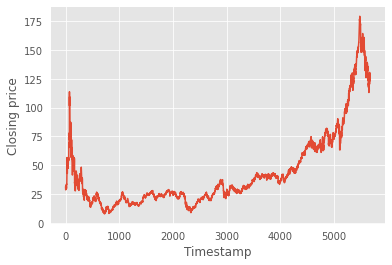

In [9]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [10]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 ):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))
print(len(X))
print(len(Y))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)
print(train_X.shape)
train_X = train_X.reshape(train_X.shape[0],100)
print(train_X.shape)
test_X = test_X.reshape(test_X.shape[0],100)
train_Y = train_Y.reshape(train_Y.shape[0])
print(train_Y.shape)
test_Y = test_Y.reshape(test_Y.shape[0])

print(len(train_X))
print(len(test_X))

5571
5571
(4456, 100, 1)
(4456, 100)
(4456,)
4456
1115


In [11]:
train_X = train_X.reshape(train_X.shape[0],100,1)
test_X = test_X.reshape(test_X.shape[0],100,1)
print(train_X.shape)
print(test_X.shape)

(4456, 100, 1)
(1115, 100, 1)


In [12]:
from keras import backend as K
#     return np.max(np.abs(y_true - y_pred))

# Computing Sensitivity
def max_(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    return K.max(K.abs(y_true_f - y_pred_f))

def R2(y_true, y_pred):
    weight = 1.0

    numerator_k = (weight * (y_true - y_pred) ** 2)
    numerator=K.sum(numerator_k)
    denominator_k = (
            weight * (y_true - K.mean(y_true, axis=0)) ** 2
    )
    denominator=K.sum(denominator_k)
    nonzero_denominator = denominator != 0
    nonzero_numerator = numerator != 0
    valid_score = nonzero_denominator & nonzero_numerator
    print(valid_score,'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''')
#     output_scores = K.ones([y_true.shape[1]])
    output_scores = 1 - (numerator / denominator)
    return K.mean(output_scores)

def Var_E(y_true,y_pred):
    y_diff_avg = K.mean(y_true - y_pred)
    numerator =  K.mean((y_true - y_pred - y_diff_avg) ** 2)

    y_true_avg =  K.mean(y_true)
    denominator =   K.mean((y_true - y_true_avg) ** 2)
    output_scores = 1 - (numerator / denominator)                                     
    return K.mean(output_scores)                                      


2022-10-20 13:37:22.776886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-20 13:37:22.776913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import max_error

rnn_size=12
rnn_size1=12
input_shapes=(100,1)
input_p = tf.keras.Input(shape=input_shapes)
# x=Conv1D(120, kernel_size=3, activation='relu')(input_p)

# conv_shape = x.get_shape()
# print(conv_shape)
# x = tf.keras.layers.Reshape(target_shape=(int(conv_shape[1]), int(conv_shape[2]*conv_shape[3])))(x)

x = tf.keras.layers.GRU(rnn_size, return_sequences=True, name='gru1')(input_p)
# x = tf.keras.layers.GRU(rnn_size, return_sequences=True, name='gru2')(x)




x=tf.keras.layers.Dropout(0.5)(x)

x=tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(500)(x)

x = tf.keras.layers.Dense(1)(x)

model=tf.keras.Model(inputs=input_p, outputs=x)
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# model.add(Dense(1, activation='linear'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae',max_,R2,Var_E])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_max_',
                                            patience=7,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
history_gru = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=15,batch_size=400, verbose=1,callbacks=[learning_rate_reduction])

# from tensorflow.keras.optimizers import SGD

2022-10-20 13:37:24.034482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-20 13:37:24.034509: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-20 13:37:24.034528: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (webtech-H81M-S): /proc/driver/nvidia/version does not exist
2022-10-20 13:37:24.034740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 gru1 (GRU)                  (None, 100, 12)           540       
                                                                 
 dropout (Dropout)           (None, 100, 12)           0         
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
Tensor("and:0", shape=(), dtype=bool) 
Tens

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Bidirectional, TimeDistributed,LSTM
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
train_X_kagg = train_X.reshape(train_X.shape[0],1,100,1)
test_X_kagg = test_X.reshape(test_X.shape[0],1,100,1)
model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae',max_,R2,Var_E])

history_kagg = model.fit(train_X_kagg, train_Y, validation_data=(test_X_kagg,test_Y), epochs=15,batch_size=400, verbose=1, shuffle =True)

Epoch 1/15
Tensor("and:0", shape=(), dtype=bool) 
Tensor("and:0", shape=(), dtype=bool) 
12/12 [==============================] - 10s 255ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1439 - max_: 0.7620 - R2: 0.3361 - Var_E: 0.3599 - val_loss: 0.0222 - val_mse: 0.0222 - val_mae: 0.1163 - val_max_: 0.5530 - val_R2: 0.6510 - val_Var_E: 0.7159
Epoch 2/15
12/12 [==============================] - 1s 118ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0953 - max_: 0.4637 - R2: 0.7130 - Var_E: 0.7230 - val_loss: 0.0120 - val_mse: 0.0120 - val_mae: 0.0827 - val_max_: 0.3759 - val_R2: 0.8118 - val_Var_E: 0.8134
Epoch 3/15
12/12 [==============================] - 1s 120ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0804 - max_: 0.4880 - R2: 0.7908 - Var_E: 0.7946 - val_loss: 0.0111 - val_mse: 0.0111 - val_mae: 0.0802 - val_max_: 0.3984 - val_R2: 0.8259 - val_Var_E: 0.8611
Epoch 4/15
12/12 [==============================] - 1s 121ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0746 - max_: 0.4438 - R2:

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import max_error

rnn_size=12
rnn_size1=12
input_shapes=(100,1)
input_p = tf.keras.Input(shape=input_shapes)
# # x=Conv1D(120, kernel_size=3, activation='relu')(input_p)

# conv_shape = x.get_shape()
# print(conv_shape)
# x = tf.keras.layers.Reshape(target_shape=(int(conv_shape[1]), int(conv_shape[2]*conv_shape[3])))(x)

x = tf.keras.layers.LSTM(rnn_size, return_sequences=True, name='gru1')(input_p)
# x = tf.keras.layers.GRU(rnn_size, return_sequences=True, name='gru2')(x)


x=tf.keras.layers.Dropout(0.5)(x)

x=tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(500)(x)

x = tf.keras.layers.Dense(1)(x)

model=tf.keras.Model(inputs=input_p, outputs=x)
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# model.add(Dense(1, activation='linear'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae',max_,R2,Var_E])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_max_',
                                            patience=7,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
history_lstm = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=15,batch_size=400, verbose=1,callbacks=[learning_rate_reduction])

# from tensorflow.keras.optimizers import SGD,  Adam, Adadelta

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 gru1 (LSTM)                 (None, 100, 12)           672       
                                                                 
 dropout_3 (Dropout)         (None, 100, 12)           0         
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
Tensor("and:0", shape=(), dtype=bool) 
Te

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
# from tensorflow.keras.metrics import RootMeanSquaredErrorval_max_
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import max_error

rnn_size=12
rnn_size1=12
input_shapes=(100,1)
input_p = tf.keras.Input(shape=input_shapes)
x=Conv1D(560, kernel_size=3, activation='relu')(input_p)

conv_shape = x.get_shape()
print(conv_shape)
# x = tf.keras.layers.Reshape(target_shape=(int(conv_shape[1]), int(conv_shape[2]*conv_shape[3])))(x)

# x = tf.keras.layers.LSTM(rnn_size, return_sequences=True, name='gru1')(input_p)
# x = tf.keras.layers.GRU(rnn_size, return_sequences=True, name='gru2')(x)


x=tf.keras.layers.Dropout(0.5)(x)

x=tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(500)(x)Loss

x = tf.keras.layers.Dense(1)(x)

model=tf.keras.Model(inputs=input_p, outputs=x)
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# model.add(Dense(1, activation='linear'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae',max_,R2,Var_E])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_max_',
                                            patience=7,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
history_cnn = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=15,batch_size=400, verbose=1,callbacks=[learning_rate_reduction])


(None, 98, 560)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 98, 560)           2240      
                                                                 
 dropout_4 (Dropout)         (None, 98, 560)           0         
                                                                 
 flatten_3 (Flatten)         (None, 54880)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 54881     
                                                                 
Total params: 57,121
Trainable params: 57,121
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
Tensor("and:0", shape=(

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import max_error

rnn_size=12
rnn_size1=12
input_shapes=(100,1)
input_p = tf.keras.Input(shape=input_shapes)
x=Conv1D(120, kernel_size=3, activation='relu')(input_p)

conv_shape = x.get_shape()
print(conv_shape)
# x = tf.keras.layers.Reshape(target_shape=(int(conv_shape[1]), int(conv_shape[2]*conv_shape[3])))(x)

x = tf.keras.layers.GRU(rnn_size, return_sequences=True, name='gru1')(x)
x = tf.keras.layers.GRU(rnn_size, return_sequences=True, name='gru2')(x)


x=tf.keras.layers.Dropout(0.5)(x)

x=tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(500)(x)

x = tf.keras.layers.Dense(1)(x)

model=tf.keras.Model(inputs=input_p, outputs=x)
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae',max_,R2,Var_E])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_max_',
                                            patience=7,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
history_propos = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=15,batch_size=400, verbose=1,callbacks=[learning_rate_reduction])

# from tensorflow.keras.optimizers import SGD,  Adam, Adadelta

(None, 98, 120)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 98, 120)           480       
                                                                 
 gru1 (GRU)                  (None, 98, 12)            4824      
                                                                 
 gru2 (GRU)                  (None, 98, 12)            936       
                                                                 
 dropout_5 (Dropout)         (None, 98, 12)            0         
                                                                 
 flatten_4 (Flatten)         (None, 1176)              0         
                                                                 
 dense_4 (Dense)             (None, 500)   

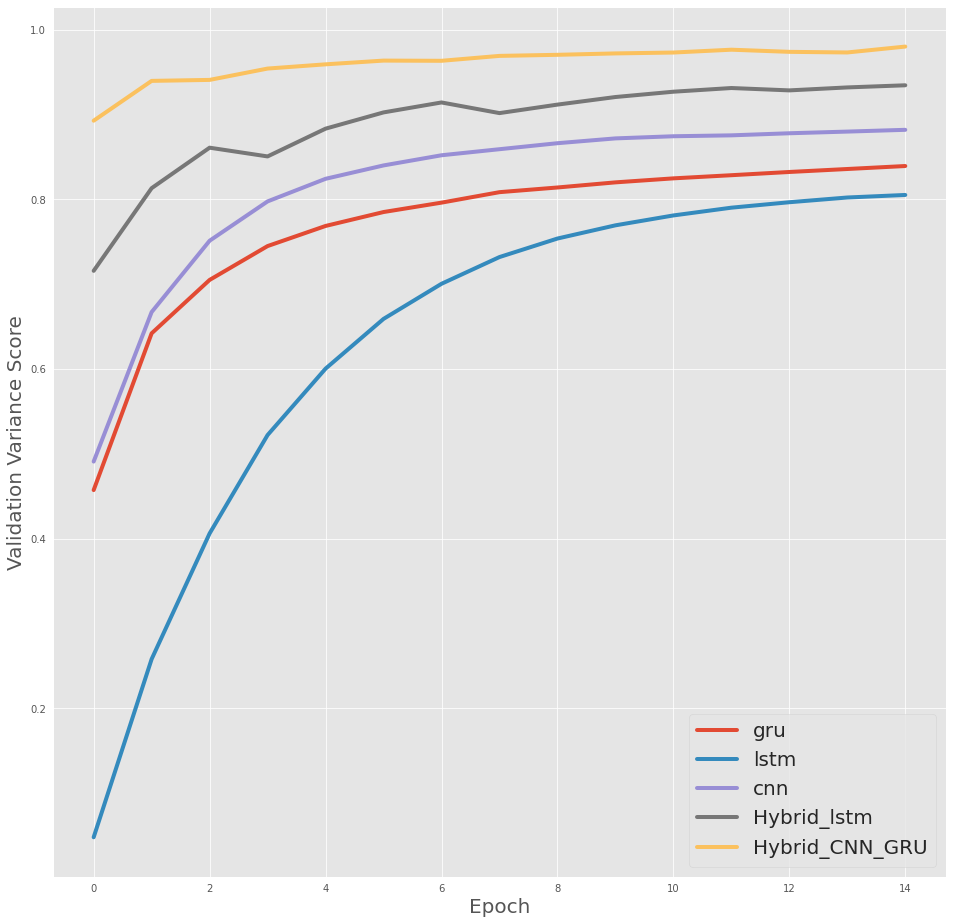

In [18]:
# plt.plot(history_gru.history['val_Var_E'], label='gru')
# plt.plot(history_gru.history['val_R2'], label='gru')
##max error comparision of all algorithm
plt.figure(figsize=(16, 16))
plt.plot(history_gru.history['val_Var_E'], label='gru',linewidth=4, markersize=12)
plt.plot(history_lstm.history['val_Var_E'], label='lstm',linewidth=4, markersize=12)
plt.plot(history_cnn.history['val_Var_E'], label='cnn',linewidth=4, markersize=12)
plt.plot(history_kagg.history['val_Var_E'], label='Hybrid_lstm',linewidth=4, markersize=12)
plt.plot(history_propos.history['val_Var_E'], label='Hybrid_CNN_GRU',linewidth=4, markersize=12)

# plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("Validation Variance Score",fontsize=20)
plt.legend(fontsize=20) # using a size in points
plt.savefig('comparison_val_Var_E.png')

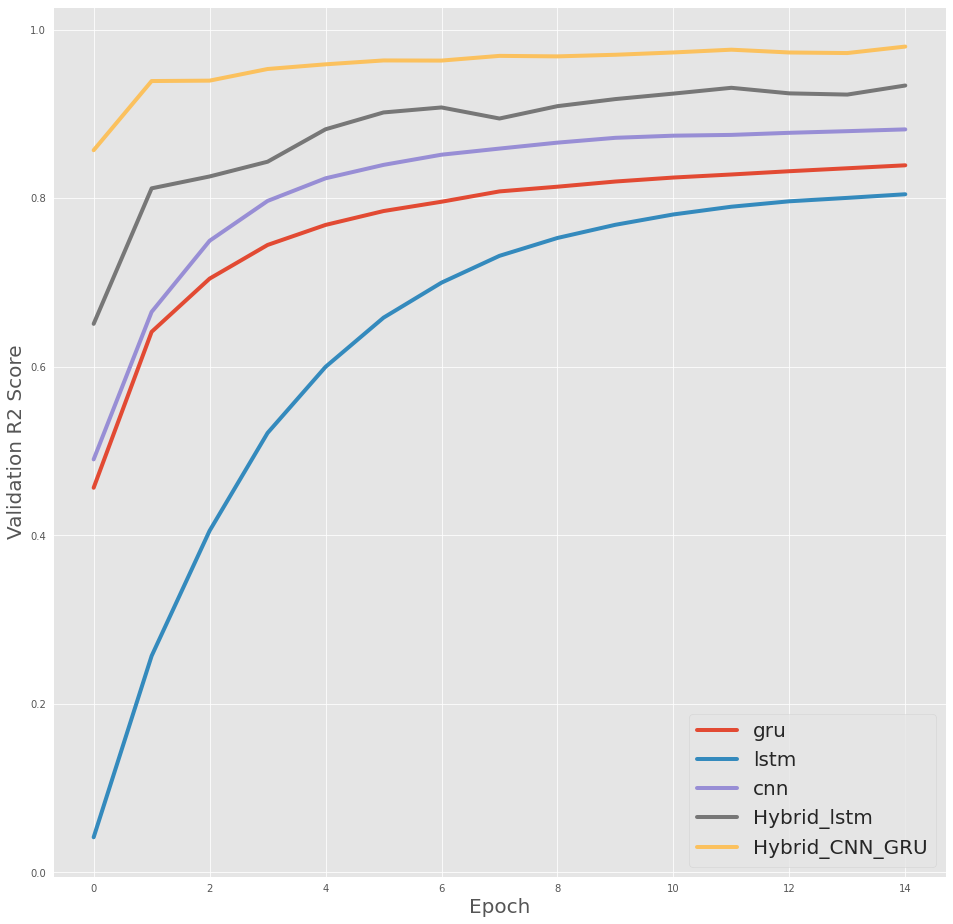

In [19]:

# plt.plot(history_gru.history['val_R2'], label='gru')
##max error comparision of all algorithm
plt.figure(figsize=(16, 16))
plt.plot(history_gru.history['val_R2'], label='gru',linewidth=4, markersize=12)
plt.plot(history_lstm.history['val_R2'], label='lstm',linewidth=4, markersize=12)
plt.plot(history_cnn.history['val_R2'], label='cnn',linewidth=4, markersize=12)
plt.plot(history_kagg.history['val_R2'], label='Hybrid_lstm',linewidth=4, markersize=12)
plt.plot(history_propos.history['val_R2'], label='Hybrid_CNN_GRU',linewidth=4, markersize=12)

# plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("Validation R2 Score",fontsize=20)
plt.legend(fontsize=20) # using a size in points
plt.savefig('comparison_val_R2.png')

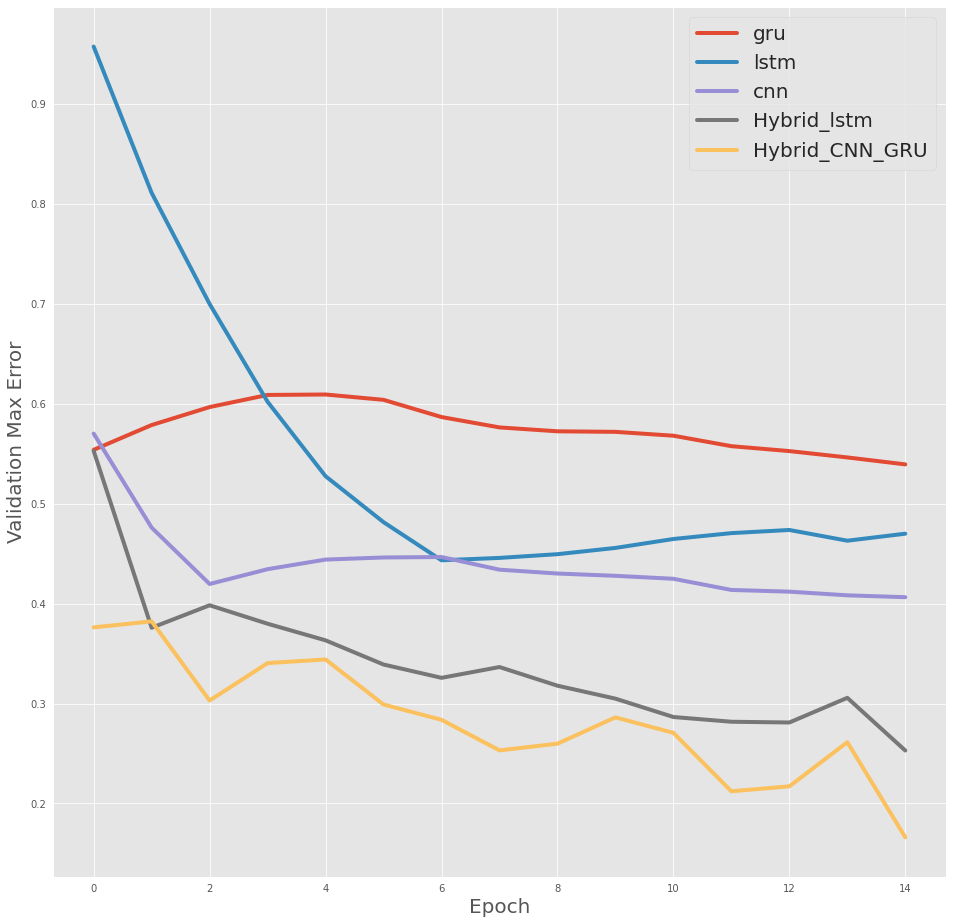

In [20]:
##max error comparision of all algorithm
plt.figure(figsize=(16, 16))
plt.plot(history_gru.history['val_max_'], label='gru',linewidth=4, markersize=12)
plt.plot(history_lstm.history['val_max_'], label='lstm',linewidth=4, markersize=12)
plt.plot(history_cnn.history['val_max_'], label='cnn',linewidth=4, markersize=12)
plt.plot(history_kagg.history['val_max_'], label='Hybrid_lstm',linewidth=4, markersize=12)
plt.plot(history_propos.history['val_max_'], label='Hybrid_CNN_GRU',linewidth=4, markersize=12)

# plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("Validation Max Error",fontsize=20)
plt.legend(fontsize=20) # using a size in points
plt.savefig('comparison_val_Max.png')

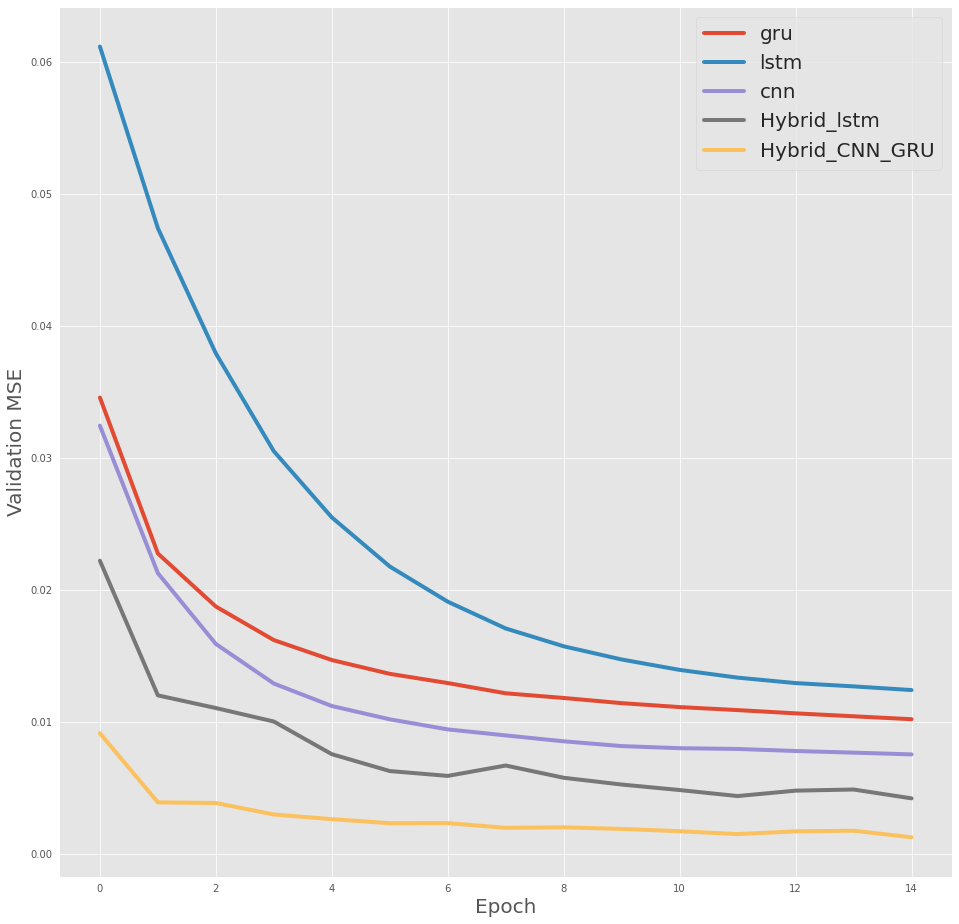

In [21]:
# plt.plot(history_gru.history['val_mse'], label='gru')
##max error comparision of all algorithm
plt.figure(figsize=(16, 16))
plt.plot(history_gru.history['val_mse'], label='gru',linewidth=4, markersize=12)
plt.plot(history_lstm.history['val_mse'], label='lstm',linewidth=4, markersize=12)
plt.plot(history_cnn.history['val_mse'], label='cnn',linewidth=4, markersize=12)
plt.plot(history_kagg.history['val_mse'], label='Hybrid_lstm',linewidth=4, markersize=12)
plt.plot(history_propos.history['val_mse'], label='Hybrid_CNN_GRU',linewidth=4, markersize=12)

# plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("Validation MSE",fontsize=20)
plt.legend(fontsize=20) # using a size in points
plt.savefig('comparison_val_MSE.png')

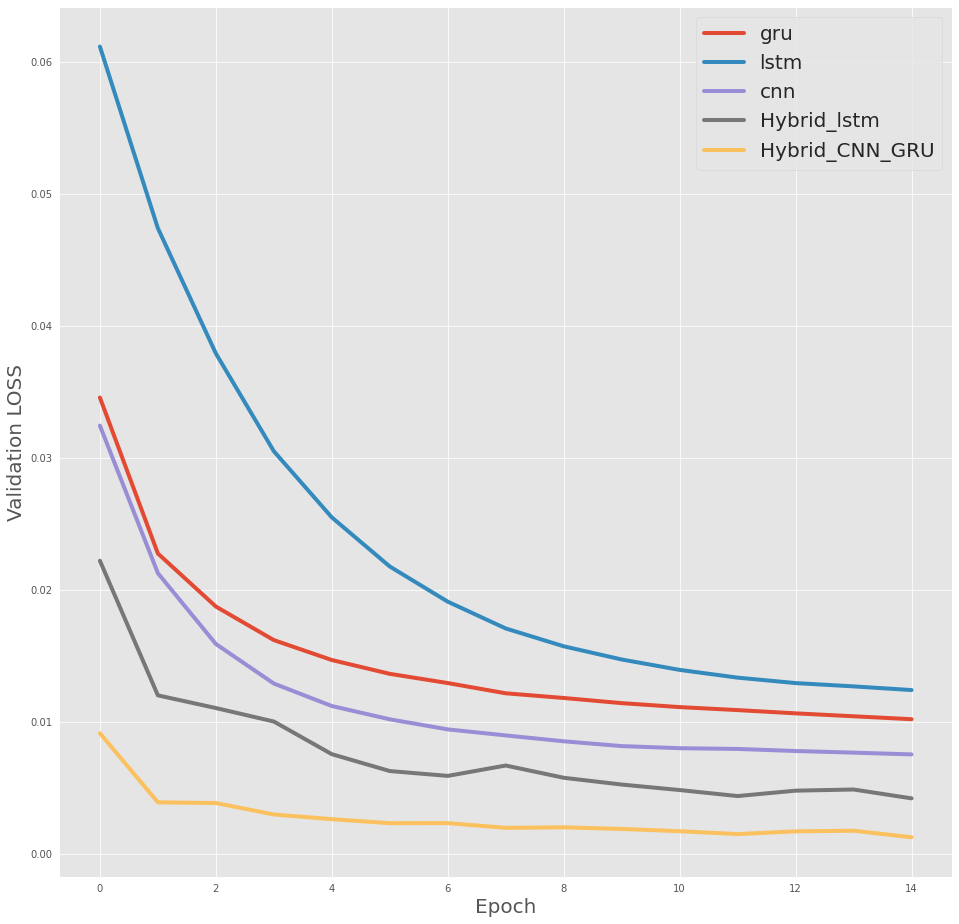

In [22]:
plt.figure(figsize=(16, 16))
plt.plot(history_gru.history['val_loss'], label='gru',linewidth=4, markersize=12)
plt.plot(history_lstm.history['val_loss'], label='lstm',linewidth=4, markersize=12)
plt.plot(history_cnn.history['val_loss'], label='cnn',linewidth=4, markersize=12)
plt.plot(history_kagg.history['val_loss'], label='Hybrid_lstm',linewidth=4, markersize=12)
plt.plot(history_propos.history['val_loss'], label='Hybrid_CNN_GRU',linewidth=4, markersize=12)

# plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("Validation LOSS",fontsize=20)
plt.legend(fontsize=20) # using a size in points
plt.savefig('comparison_val_loss.png')

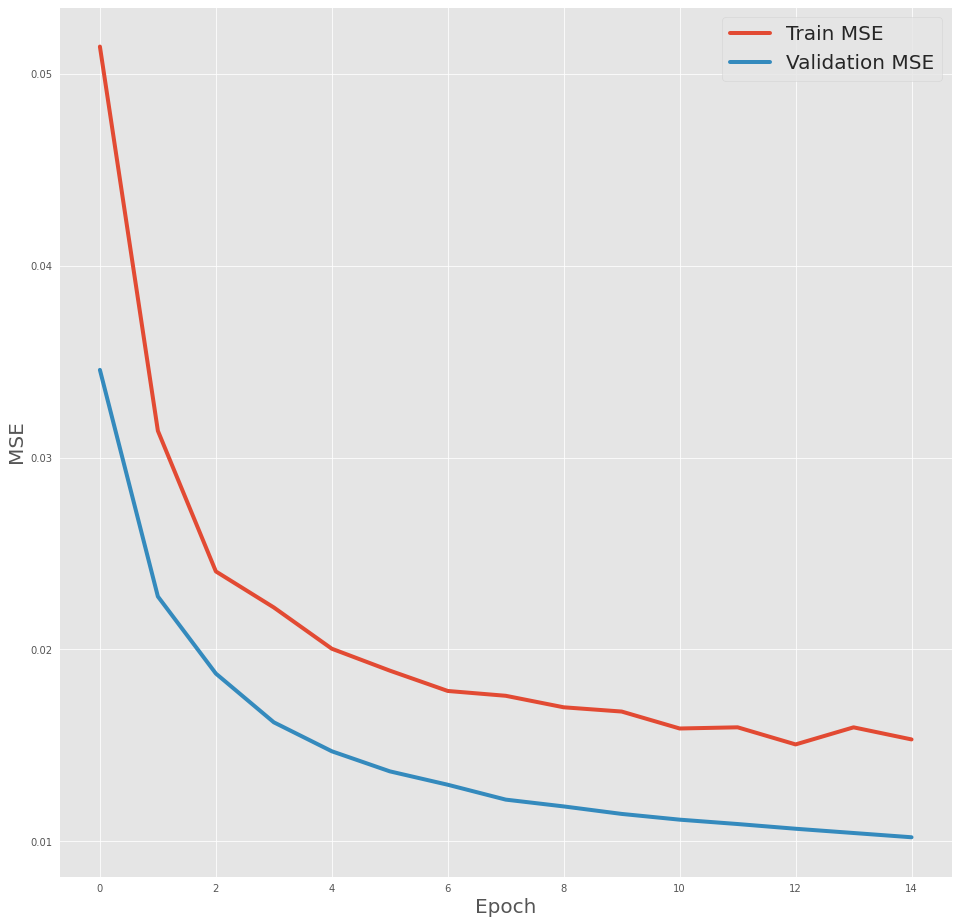

In [23]:
plt.figure(figsize=(16, 16))
plt.plot(history_gru.history['mse'], label='Train MSE',linewidth=4, markersize=12)
plt.plot(history_gru.history['val_mse'], label='Validation MSE',linewidth=4, markersize=12)
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("MSE",fontsize=20)
plt.legend(fontsize=20) # using a size in points
plt.savefig('proposed_mse.png')

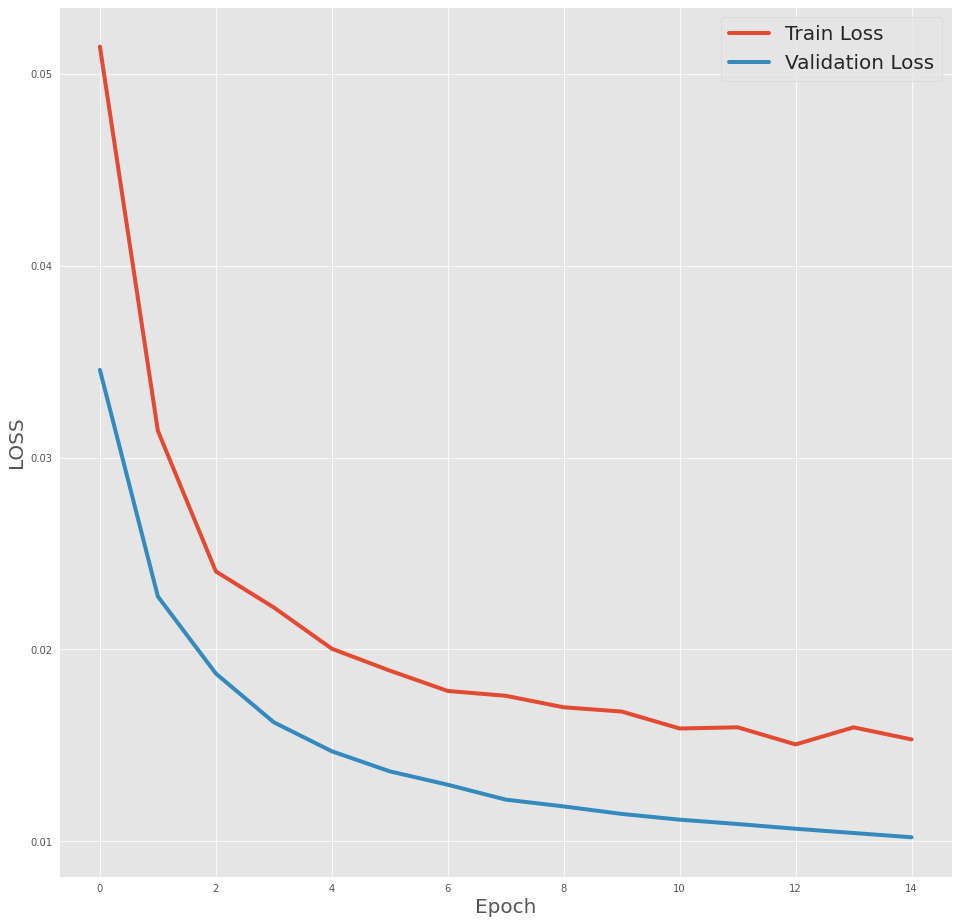

In [24]:
plt.figure(figsize=(16, 16))
plt.plot(history_gru.history['loss'], label='Train Loss',linewidth=4, markersize=12)
plt.plot(history_gru.history['val_loss'], label='Validation Loss',linewidth=4, markersize=12)
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("LOSS",fontsize=20)
plt.legend(fontsize=20) # using a size in points
plt.savefig('proposed_loss.png')

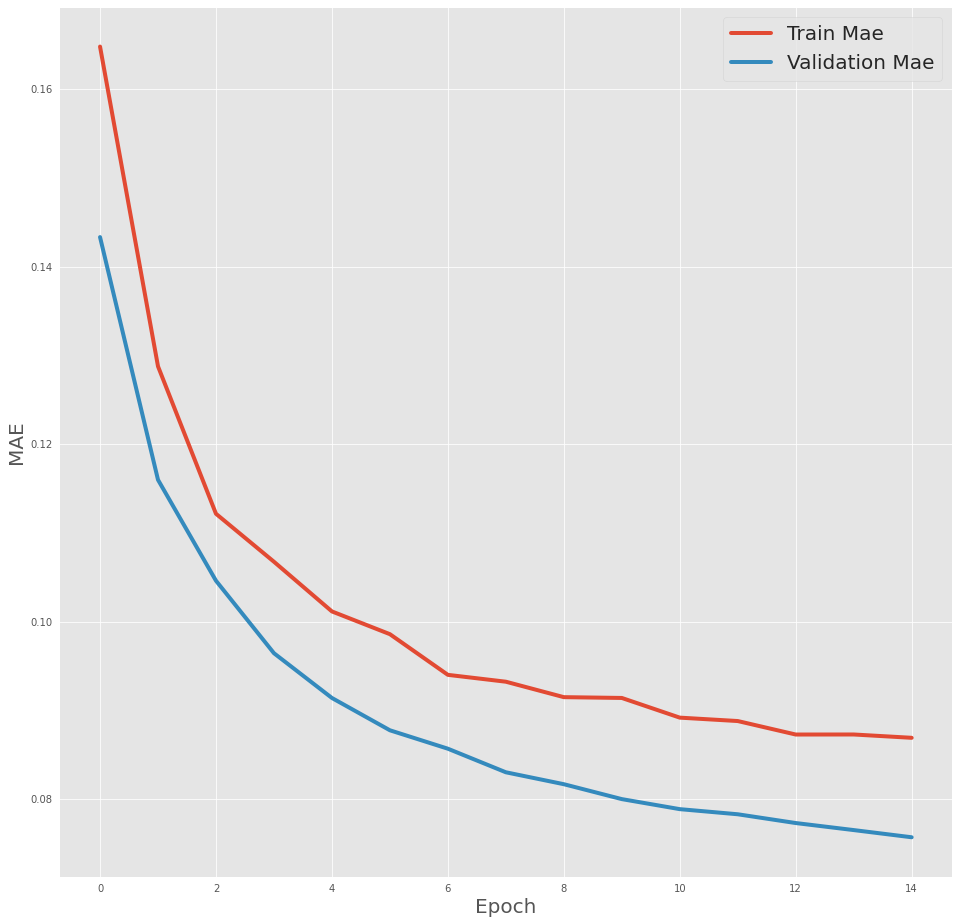

In [25]:
plt.figure(figsize=(16, 16))
plt.plot(history_gru.history['mae'], label='Train Mae',linewidth=4, markersize=12)
plt.plot(history_gru.history['val_mae'], label='Validation Mae',linewidth=4, markersize=12)
plt.xlabel("Epoch",fontsize=20)
plt.ylabel("MAE",fontsize=20)
plt.legend(fontsize=20) # using a size in points
plt.savefig('proposed_mae.png')